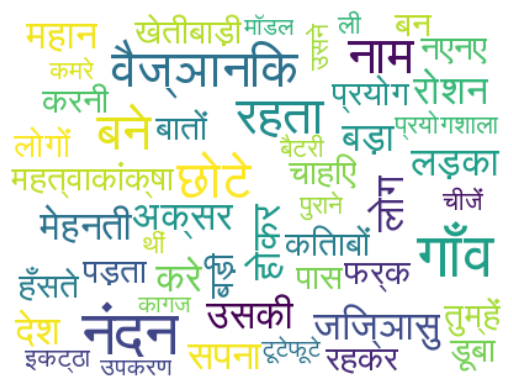

In [65]:
from wordcloud import WordCloud
from spacy.lang.hi import STOP_WORDS as STOP_WORDS_HI
import matplotlib.pyplot as plt

font="Gargi.ttf"

wordcloud = WordCloud(
    width=400,
    height=300,
    max_font_size=50, 
    max_words=1000,
    background_color="white", 
    stopwords=STOP_WORDS_HI,
    regexp=r"[\u0900-\u097F]+", 
    font_path=font
).generate(" ".join(tokens))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [1]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained mBERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')

c:\Users\dhruv\miniconda3\envs\temp\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\dhruv\miniconda3\envs\temp\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [74]:
inputs = tokenizer(text, return_tensors='pt')

# Get embeddings
with torch.no_grad():
    outputs = model(**inputs)
    # Last hidden states
    last_hidden_states = outputs.last_hidden_state

# Extract token embeddings
token_embeddings = last_hidden_states.squeeze().cpu().numpy()


In [76]:
# Token IDs and tokens
token_ids = inputs['input_ids'].squeeze().tolist()
tokens = tokenizer.convert_ids_to_tokens(token_ids)

# Print tokens with their embeddings
for token, embedding in zip(tokens, token_embeddings):
    print(f"Token: {token}, Embedding: {embedding.shape}...")  # Print first 5 values for brevity

Token: [CLS], Embedding: (768,)...
Token: एक, Embedding: (768,)...
Token: छोटे, Embedding: (768,)...
Token: से, Embedding: (768,)...
Token: गाँव, Embedding: (768,)...
Token: में, Embedding: (768,)...
Token: नं, Embedding: (768,)...
Token: ##दन, Embedding: (768,)...
Token: नाम, Embedding: (768,)...
Token: का, Embedding: (768,)...
Token: एक, Embedding: (768,)...
Token: ल, Embedding: (768,)...
Token: ##ड़, Embedding: (768,)...
Token: ##का, Embedding: (768,)...
Token: रहता, Embedding: (768,)...
Token: था, Embedding: (768,)...
Token: ।, Embedding: (768,)...
Token: वह, Embedding: (768,)...
Token: बहुत, Embedding: (768,)...
Token: ही, Embedding: (768,)...
Token: ज, Embedding: (768,)...
Token: ##ि, Embedding: (768,)...
Token: ##ज्ञ, Embedding: (768,)...
Token: ##ास, Embedding: (768,)...
Token: ##ु, Embedding: (768,)...
Token: और, Embedding: (768,)...
Token: मे, Embedding: (768,)...
Token: ##हन, Embedding: (768,)...
Token: ##ती, Embedding: (768,)...
Token: था, Embedding: (768,)...
Token: ।, Emb

c:\Users\dhruv\miniconda3\envs\temp\lib\site-packages\transformers\tokenization_utils_base.py:2888: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


(768,)
